In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

%autosave 1

Mounted at /content/gdrive


Autosaving every 1 seconds


In [ ]:
import pandas as pd , numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
timeseries_data = pd.read_csv('/content/gdrive/MyDrive/Datasets/Time_series_analysis_and_forecast_DATASET.csv')
timeseries_data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [ ]:
timeseries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
#converting the fulldate column to pandasdatetime 
timeseries_data.FullDate = pd.to_datetime(timeseries_data.FullDate)

In [ ]:
timeseries_data.set_index('FullDate',inplace=True)
timeseries_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
timeseries_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tmax,92016.0,231.696688,4562.128748,9.9000,17.30000,21.900000,27.600000,99999.9000
SysLoad,92016.0,797.623357,613.520156,-1596.8101,417.11980,856.467925,1221.293675,3264.1663
GasPrice,92016.0,6.016163,2.608116,0.0000,3.93690,5.165600,8.023300,29.9900
ElecPrice,92016.0,65.798356,213.144084,-924.8200,31.54375,48.715000,76.495000,14700.0000


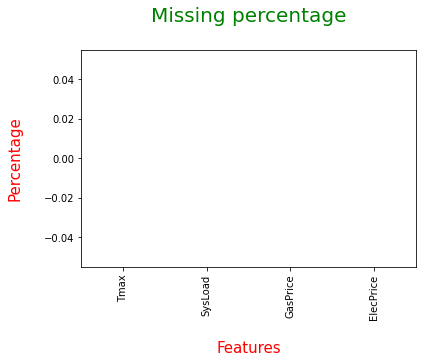

In [ ]:
#calculating the missing percentage in the data
timeseries_data.isna().mean().plot(kind='bar',color='red')
plt.xlabel('\nFeatures',fontsize=15,color='red')
plt.ylabel('Percentage\n',fontsize=15,color='red')
plt.title('Missing percentage\n',fontsize=20,color='green')
plt.show()

In [ ]:
#Resampling the data points(Downsampling) to daily
timeseries_data_daily = timeseries_data.resample('D').sum()
timeseries_data_daily

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [ ]:
timeseries_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92016 entries, 2010-09-01 00:00:00 to 2021-02-28 23:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       92016 non-null  float64
 1   SysLoad    92016 non-null  float64
 2   GasPrice   92016 non-null  float64
 3   ElecPrice  92016 non-null  float64
dtypes: float64(4)
memory usage: 3.5 MB


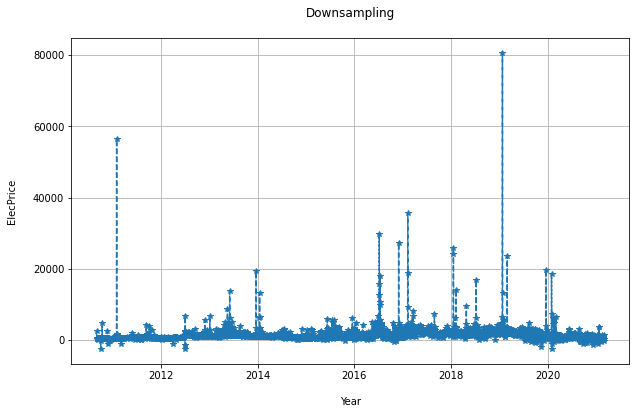

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(timeseries_data_daily.index, timeseries_data_daily.ElecPrice, '--', marker='*', )
plt.xlabel('\nYear')
plt.ylabel('ElecPrice\n')
plt.title('Downsampling\n')
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
series = timeseries_data_daily.loc[:, 'SysLoad'].values
result = adfuller(series, autolag='AIC')
print(f'p-value: {result[1]}')

p-value: 0.004253725504574117


In [ ]:
series = timeseries_data_daily.loc[:, 'ElecPrice'].values
result = adfuller(series, autolag='AIC')
for key, value in result[4].items():
    print(f'Critial Values: {key}, {value}')

Critial Values: 1%, -3.432066157296446
Critial Values: 5%, -2.8622983040036005
Critial Values: 10%, -2.5671736550459663


split the dataset into train and test

The shape of test dataset will be (x-2757) where x is the total number of data points

The train dataset will be the first 2757 days

In [ ]:
timeseries_data_daily_train_df = timeseries_data_daily[:2757]

In [ ]:
timeseries_data_daily_test_df = timeseries_data_daily[2757:]

In [ ]:
timeseries_data_daily_train_df.shape,timeseries_data_daily_test_df.shape,timeseries_data_daily.shape

((2757, 4), (1077, 4), (3834, 4))

Prepare train and test dataset by renaming FullDate column and ElecPrice for univariate modelling

In [ ]:
timeseries_data_daily_train_new_df = timeseries_data_daily_train_df.reset_index()
timeseries_data_daily_train_new_df = timeseries_data_daily_train_new_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
timeseries_data_daily_train_new_df = timeseries_data_daily_train_new_df[['ds', 'y']]
timeseries_data_daily_train_new_df

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [ ]:
timeseries_data_daily_test_new_df = timeseries_data_daily_test_df.reset_index()
timeseries_data_daily_test_new_df = timeseries_data_daily_test_new_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
timeseries_data_daily_test_new_df = timeseries_data_daily_test_new_df[['ds', 'y']]
timeseries_data_daily_test_new_df

,ds,y
0,2018-03-20,1833.000
1,2018-03-21,1730.490
2,2018-03-22,2260.550
3,2018-03-23,2138.760
4,2018-03-24,1721.700
...,...,...
1072,2021-02-24,634.770
1073,2021-02-25,577.515
1074,2021-02-26,1445.495
1075,2021-02-27,488.980


In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(timeseries_data_daily_train_new_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prediction = model.make_future_dataframe(periods=1077, freq='D') 
y_prediction = model.predict(prediction) 

In [ ]:
y_prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,851.777631,-1422.517874,3488.531250,851.777631,851.777631,144.250503,144.250503,144.250503,159.308129,159.308129,159.308129,-15.057627,-15.057627,-15.057627,0.0,0.0,0.0,996.028134
1,2010-09-02,851.727173,-1375.351731,3369.896169,851.727173,851.727173,224.453910,224.453910,224.453910,257.036327,257.036327,257.036327,-32.582418,-32.582418,-32.582418,0.0,0.0,0.0,1076.181083
2,2010-09-03,851.676716,-1389.682205,3172.242665,851.676716,851.676716,-0.584510,-0.584510,-0.584510,50.257478,50.257478,50.257478,-50.841988,-50.841988,-50.841988,0.0,0.0,0.0,851.092206
3,2010-09-04,851.626258,-1731.995298,2945.342492,851.626258,851.626258,-340.872526,-340.872526,-340.872526,-271.372061,-271.372061,-271.372061,-69.500465,-69.500465,-69.500465,0.0,0.0,0.0,510.753732
4,2010-09-05,851.575800,-1998.210968,2772.759827,851.575800,851.575800,-430.884955,-430.884955,-430.884955,-342.634443,-342.634443,-342.634443,-88.250512,-88.250512,-88.250512,0.0,0.0,0.0,420.690845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,3567.126543,386.251397,6422.313261,1713.837905,5241.271217,-91.262777,-91.262777,-91.262777,159.308129,159.308129,159.308129,-250.570906,-250.570906,-250.570906,0.0,0.0,0.0,3475.863766
3830,2021-02-25,3567.943112,590.162638,6416.710078,1712.030046,5245.275365,-25.199382,-25.199382,-25.199382,257.036327,257.036327,257.036327,-282.235709,-282.235709,-282.235709,0.0,0.0,0.0,3542.743730
3831,2021-02-26,3568.759681,278.303683,6304.726199,1710.343941,5249.279514,-259.098963,-259.098963,-259.098963,50.257478,50.257478,50.257478,-309.356441,-309.356441,-309.356441,0.0,0.0,0.0,3309.660718
3832,2021-02-27,3569.576250,125.518237,5603.964177,1708.657836,5253.283662,-603.110641,-603.110641,-603.110641,-271.372061,-271.372061,-271.372061,-331.738579,-331.738579,-331.738579,0.0,0.0,0.0,2966.465610


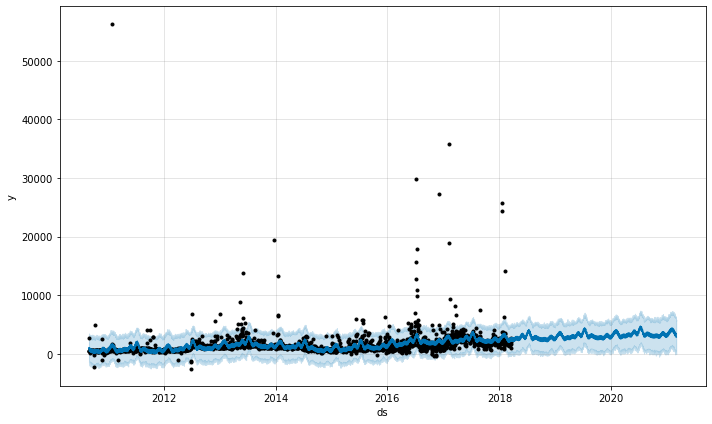

In [ ]:
# Plotting the predictions
model.plot(y_prediction)
plt.show()

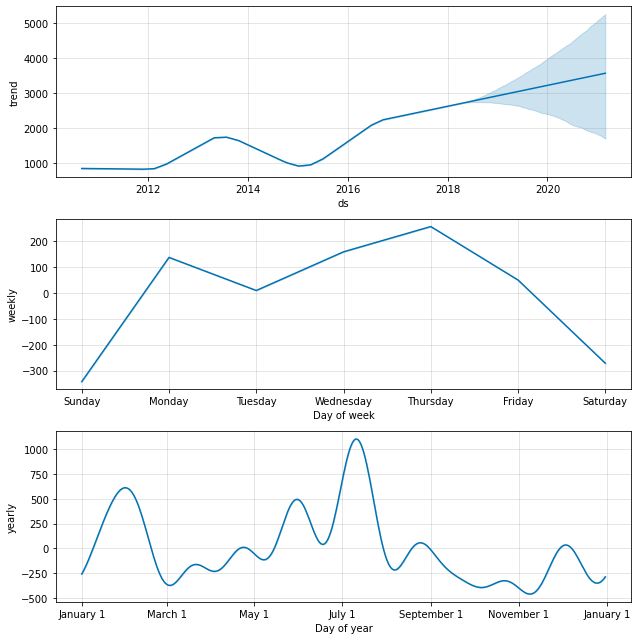

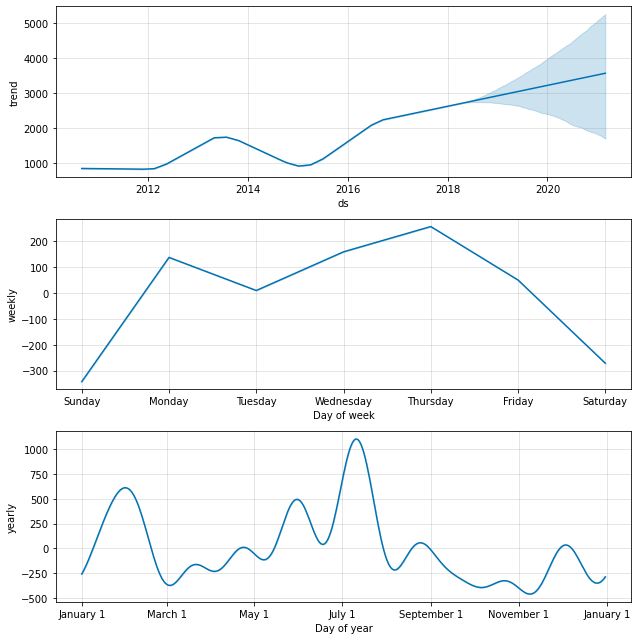

In [ ]:
#plotting the components
model.plot_components(y_prediction)

In [ ]:
#defining the mape function 
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape(timeseries_data_daily_test_new_df['y'], y_prediction['yhat'][2757:])

549.4751413716547

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(timeseries_data_daily_test_new_df['y'], y_prediction['yhat'][2757:])
rmse = round(np.sqrt(mse), 2)
rmse

3218.16

Multivariate analysis

In [ ]:
timeseries_data_daily_multi = timeseries_data_daily.reset_index().rename(columns={"FullDate": "ds", "ElecPrice": "y", 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'})

In [ ]:
timeseries_data_daily_multi

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
timeseries_data_daily_multi_train = timeseries_data_daily_multi[:2757]

In [ ]:
timeseries_data_daily_multi_test = timeseries_data_daily_multi[2757:]

In [ ]:
timeseries_data_daily_multi_train.shape,timeseries_data_daily_multi_test.shape,timeseries_data_daily_multi.shape

((2757, 5), (1077, 5), (3834, 5))

In [ ]:
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.fit(timeseries_data_daily_multi_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prediction_multi = model2.make_future_dataframe(periods=1077, freq='D') 
prediction_multi['add1'] = timeseries_data_daily_multi['add1'].values
prediction_multi['add2'] = timeseries_data_daily_multi['add2'].values
prediction_multi['add3'] = timeseries_data_daily_multi['add3'].values
prediction_multi_y = model2.predict(prediction_multi) 

In [ ]:
prediction_multi_y

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,999.344125,-655.245057,3666.441772,999.344125,999.344125,1036.684496,1036.684496,1036.684496,0.246552,...,42.497418,42.497418,42.497418,-4.148520,-4.148520,-4.148520,0.0,0.0,0.0,1517.026982
1,2010-09-02,999.900105,-699.336314,3668.513707,999.900105,999.900105,887.762012,887.762012,887.762012,0.247400,...,145.822951,145.822951,145.822951,-7.069370,-7.069370,-7.069370,0.0,0.0,0.0,1469.066011
2,2010-09-03,1000.456085,-619.197310,4100.631730,1000.456085,1000.456085,1042.290892,1042.290892,1042.290892,0.241251,...,-44.133439,-44.133439,-44.133439,-10.049485,-10.049485,-10.049485,0.0,0.0,0.0,1699.128738
3,2010-09-04,1001.012066,-1237.176597,3189.406428,1001.012066,1001.012066,705.634840,705.634840,705.634840,0.251004,...,-117.735502,-117.735502,-117.735502,-12.818541,-12.818541,-12.818541,0.0,0.0,0.0,912.988678
4,2010-09-05,1001.568046,-872.549123,3518.997049,1001.568046,1001.568046,704.144995,704.144995,704.144995,0.248460,...,-69.893610,-69.893610,-69.893610,-15.133453,-15.133453,-15.133453,0.0,0.0,0.0,1331.257873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,2613.638806,-1374.378346,3304.103448,1827.983735,3432.484677,-1370.015380,-1370.015380,-1370.015380,0.232558,...,42.497418,42.497418,42.497418,-433.966750,-433.966750,-433.966750,0.0,0.0,0.0,968.116139
3830,2021-02-25,2614.335469,-1020.892523,3827.771327,1827.358148,3434.180349,-1031.298343,-1031.298343,-1031.298343,0.234254,...,145.822951,145.822951,145.822951,-460.424670,-460.424670,-460.424670,0.0,0.0,0.0,1327.184016
3831,2021-02-26,2615.032132,-977.559271,3697.119755,1826.732561,3435.876021,-753.271482,-753.271482,-753.271482,0.231710,...,-44.133439,-44.133439,-44.133439,-481.109661,-481.109661,-481.109661,0.0,0.0,0.0,1390.504500
3832,2021-02-27,2615.728795,-1175.624275,3483.287112,1826.106975,3437.571693,-1009.303844,-1009.303844,-1009.303844,0.230226,...,-117.735502,-117.735502,-117.735502,-495.783335,-495.783335,-495.783335,0.0,0.0,0.0,1045.410966


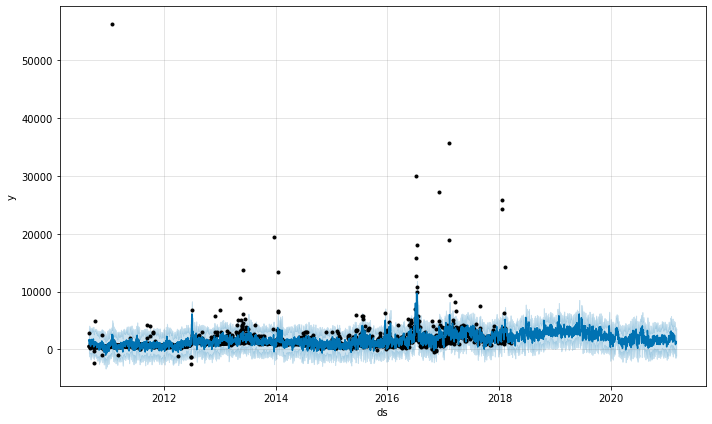

In [ ]:
# Plotting the predictions
model2.plot(prediction_multi_y)
plt.show()

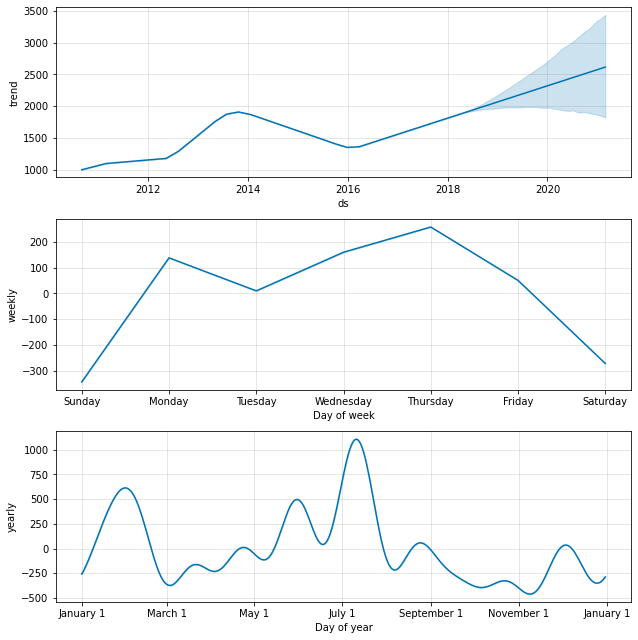

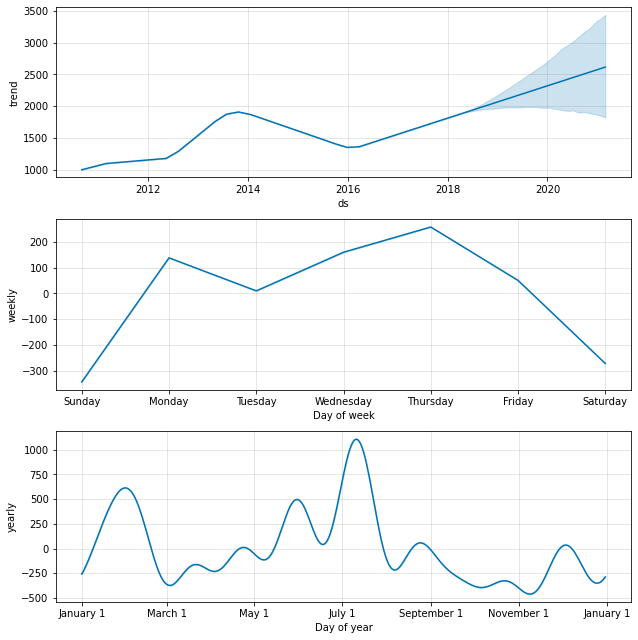

In [ ]:
#ploting the components
model.plot_components(prediction_multi_y)

In [ ]:
#calculating the mape
mape(timeseries_data_daily_multi_test['y'], prediction_multi_y['yhat'][2757:])

233.74494702819595

In [ ]:
#calculating the rmse
mse_multi = mean_squared_error(timeseries_data_daily_multi_test['y'], prediction_multi_y['yhat'][2757:])
rmse_multi = round(np.sqrt(mse_multi), 2)
rmse_multi

2709.65

Akshay Satpute

ID: 147ccfd44e01f000